# ML for Refgression


In [1]:
import pandas as pd
import numpy as np

# Data Preparation

In [2]:
data='https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data

--2025-11-03 14:36:13--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  4.10MB/s    in 0.3s    

2025-11-03 14:36:14 (4.10 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.columns= df.columns.str.lower().str.replace(' ','_')

In [4]:
strings= list(df.dtypes[df.dtypes == 'object'].index) # dtype is used to find data type of each column
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [5]:
for col in strings:
    df[col]= df[col].str.lower().str.replace(' ','_')

In [6]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory data Analysis

In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()
    

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

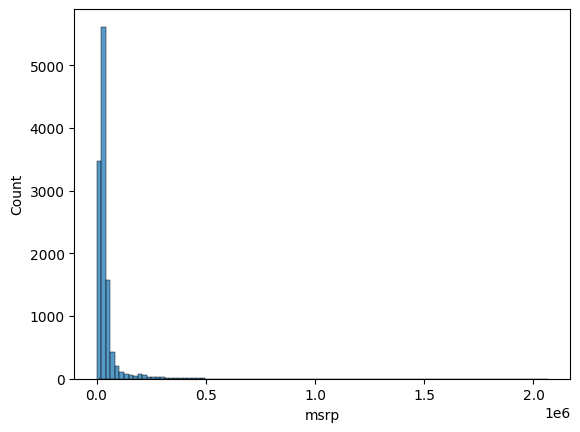

In [10]:
sns.histplot(df.msrp, bins=100)

<Axes: xlabel='msrp', ylabel='Count'>

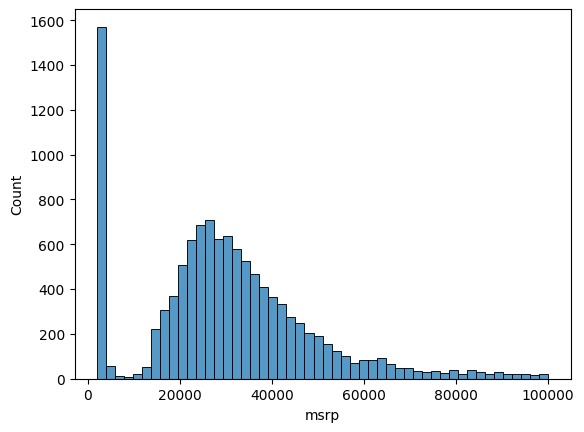

In [11]:
sns.histplot(df.msrp[df.msrp< 100000], bins=50)

In [12]:
price_logs =np.log1p(df.msrp)

In [13]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

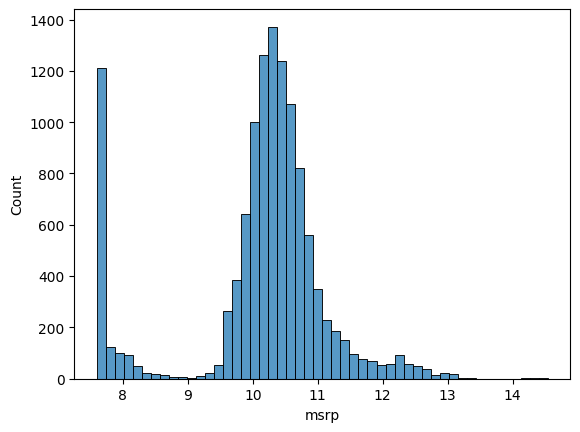

In [14]:
sns.histplot(price_logs, bins=50)

In [15]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting up the validation framework¶

In [16]:
n=len(df)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train= n-n_val-n_test


In [17]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [18]:
idx=np.arange(n)  #this is making all the n into a array of n numbers (0 to n-1)

In [19]:
np.random.seed(2)
np.random.shuffle(idx)

In [20]:
df_train=df.iloc[idx[:n_train]] #
df_val=df.iloc[idx[n_train:n_train+n_val]]
df_test=df.iloc[idx[n_train+n_val:]]


In [21]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [22]:
# there is no varaiety in data set, we have the bmw in validation. We have to shuffled it


In [23]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [24]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [25]:
df_train= df_train.reset_index(drop=True) 
df_val= df_val.reset_index(drop=True) 
df_test= df_test.reset_index(drop=True) 
#to drop the index column | df_train.reset_index() resets the index of df_train, but it keeps the old index as a new column,(drop=True) 
#drops the old index completely  
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [26]:
df_train.msrp #isko log tranform karenge, to make values smaller


0        14410
1        19685
2        19795
3         2000
4        56260
         ...  
7145     54900
7146     29215
7147     34675
7148    303300
7149     37820
Name: msrp, Length: 7150, dtype: int64

In [27]:
y_train=np.log1p(df_train.msrp.values)
y_val=np.log1p(df_val.msrp.values)
y_test=np.log1p(df_test.msrp.values)

In [28]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# 2.5 Linear regression

In [29]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [30]:
# abhi we will just take three columns to understand the process. engine_hp | city_mpg  | popularity
xi=[453,11,86] #this is our Xi= [453,11,86], one instance of car data.
#we need to make function g, which will take Xi as input and give us prediction Yi, g(Xi)=Yi

In [31]:
def g(xi):
    #do somethig
    return 1000
#we need to implement this.

Linear regression formula g(xi)= W0+ W1xi1+ W2xi2 + W3xi3

In [32]:
w0=7.17
w=[0.01,0.04,0.002]

In [33]:
def linear_regression(xi):
    n= len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]
    #do somethig
    return pred
#here we have implemented above code in cell36

In [34]:
linear_regression(xi)

12.312

what does this actually mean?

7.17 (w0) + 453 * 0.01 + 11* 0.04 + 86*0.002 = 12.3 (prediction)

In [35]:
np.expm1(12.312) #this gives real value of car after expanding the log number

np.float64(222347.2221101062)

# 2.6 Linear regression vector form

In [36]:
def dot(xi, w):
    n=len(xi)

    res=0.0

    for j in range(n):
        res= res + xi[j] * w[j]
    return res

In [37]:
def linear_regression(xi):
    return w0 + dot(xi, w)


yaha tak we kept w0 (bias term) separate from other w terms, but in below cells, we make a w_new array to include w0 in it,
this will make add 1 in xi array.

In [38]:
w_new = [w0] + w

In [39]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [40]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)


In [41]:
linear_regression(xi)

12.312

In [42]:
xi=[453,11,86]
w0=7.17
w=[0.01,0.04,0.002]

In [43]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X= np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [44]:
def linear_regression(X):
    return X.dot(w_new)

In [45]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

#  2.7  Training a Linear Regression model

basically finding value of Ws

In [46]:
def train_linear_regression(X,y):
    pass

We will write this funtion later, for now lets understand the  code line by line

In [60]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]
]
X= np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [48]:
ones = np.ones(X.shape[0])  #np.ones(9)

In [49]:
X = np.column_stack([ones, X])

In [50]:
y= [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [51]:
XTX= X.T.dot(X) #XTX is X transpose dot X, gram matrix

In [52]:
XTX_inverse = np.linalg.inv(XTX)

In [53]:
XTX.dot(XTX_inverse). round(1) #checking for identity matrix

array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [-0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

This is the formula for fiding W array
$$w= (X^T.X)^{-1}.X^T.y$$

In [54]:
w_full= XTX_inverse.dot(X.T).dot(y)

In [55]:
w_full

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

In [56]:
w0= w_full[0]
w=w_full[1:]

In [57]:
w0, w

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

Now lets write the fucntion that we had left

In [58]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX= X.T.dot(X)
    XTX_inverse = np.linalg.inv(XTX)
    w_full= XTX_inverse.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

ye code run karne k time X matrix should not have ones, function adds that

In [61]:
train_linear_regression(X,y)

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

# 2.8 Car Price Baseline Model

In [62]:
df_train.columns


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [63]:
base= ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [64]:
df_train[base].values

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [65]:
X_train = df_train[base].values

In [66]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [67]:
train_linear_regression(X_train,y_train)

(np.float64(nan), array([nan, nan, nan, nan, nan]))

nan came because there are some missing values.

In [68]:
df_train[base].isnull().sum()  #this gives sum of missing values

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [69]:
df_train[base].fillna(0).isnull().sum() #fills nan with 0

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [70]:
X_train = df_train[base].fillna(0).values

In [71]:
w0, w = train_linear_regression(X_train,y_train)


In [72]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

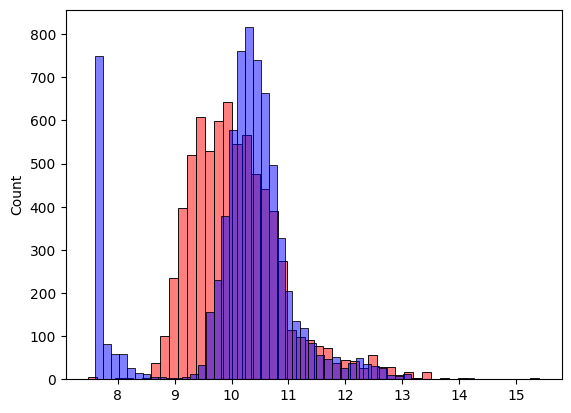

In [73]:
sns.histplot(y_pred, color='red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color='blue', alpha = 0.5, bins = 50)

# 2.9 RMSE

root mean square error, for measuring quality of the model

$(((g(xi)-yi)^2)/m)^{-1/2}$

In [74]:
def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [75]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

Ab tak we took training data, found out w0 and w, fir vahi w0, w and same trainig data use karke y_pred nikala and compare y_pred and y_train

# 2.10 Validating the model

But now we will use traing to find w0 and 1 but vo w0 and w k sath we will use df_val (validation data) to predict y, aur y_val 
anf y_pred use karenge to find rsme

In [76]:
base= ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_train.dot(w)

In [ ]:
def prepare_X(df):   #we are simplyfying and making X_train more generic
    df_num = df[base] #df because it could be any data set
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

# 2.11 Simple Feature Engineering

adding new features, now we will add age

In [78]:
df_train.year.max() #this tells when data was collected

np.int64(2017)

In [79]:
2017-df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [84]:
def prepare_X(df):   

    df = df.copy()

    df['age']= 2017-df.year

    feature = base + ['age']
    df_num = df[feature] 
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [85]:
X_train = prepare_X(df_train)

In [87]:
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]],
      shape=(7150, 6))

In [88]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5172055461058299)

In [ ]:
sns.histplot(y_pred, color='red', alpha = 0.5, bins = 50)
sns.histplot(y_, color='blue', alpha = 0.5, bins = 50)